# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



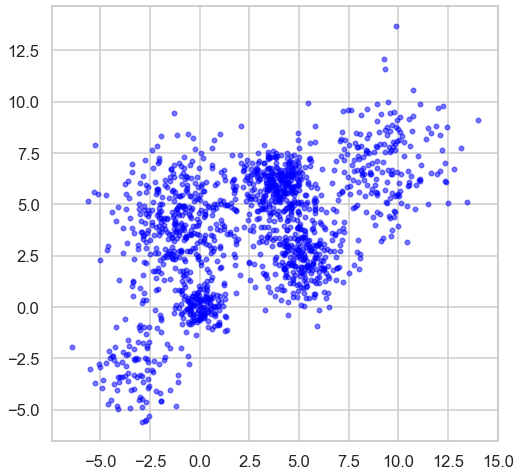

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
from sklearn.cluster import KMeans

n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(Multi_blob_Data)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")


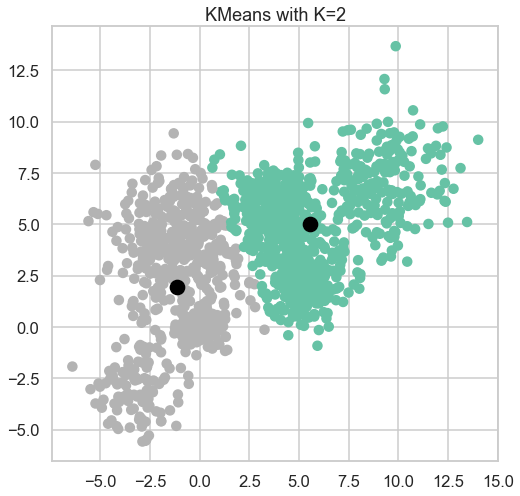

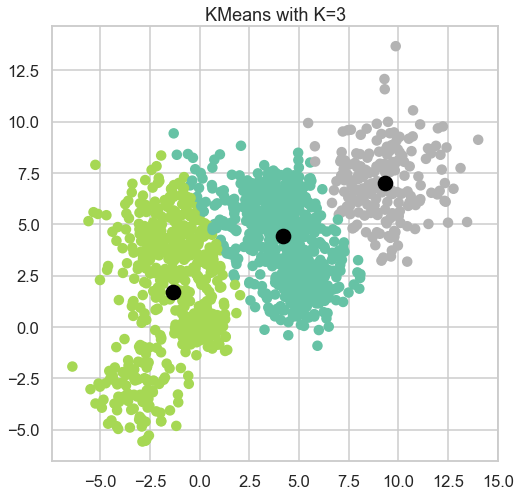

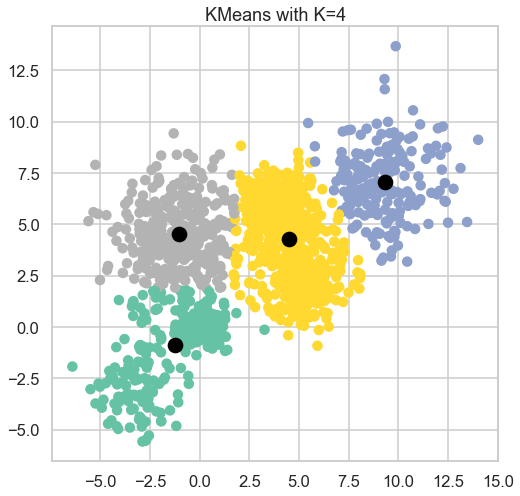

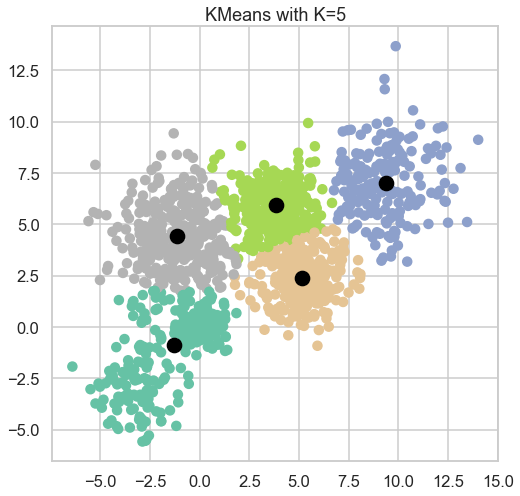

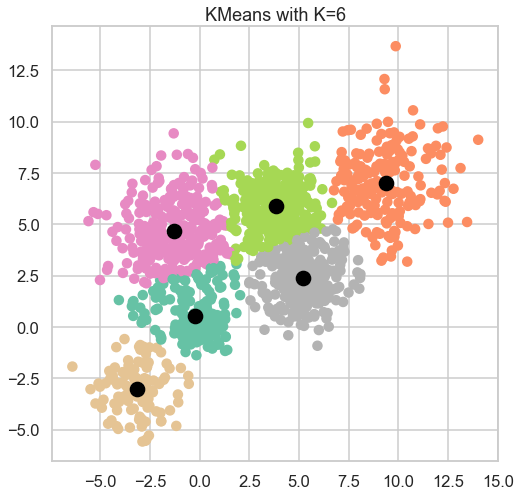

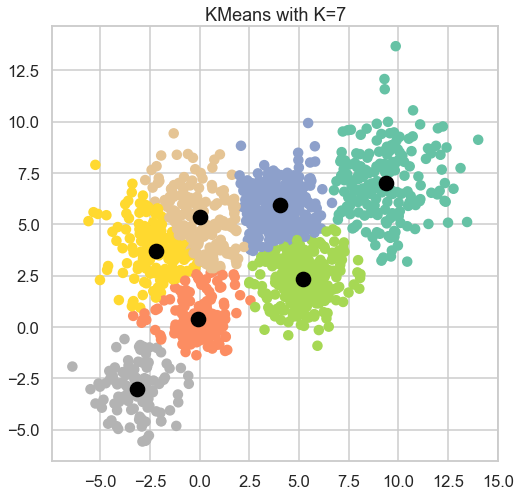

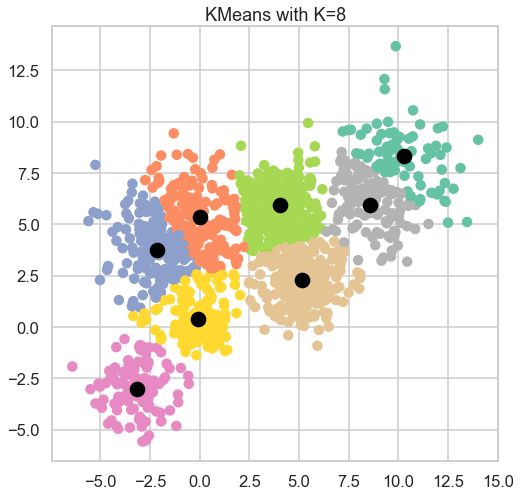

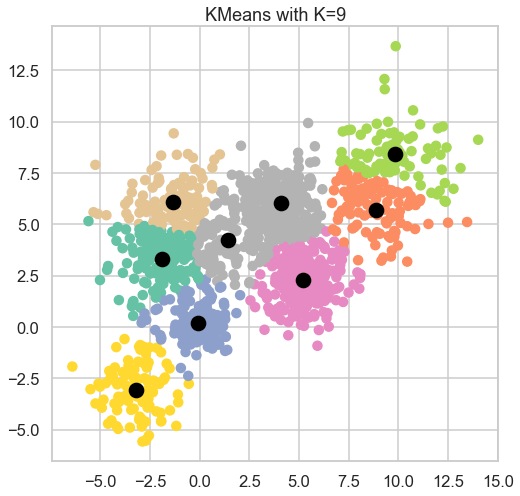

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create a list of different values of K
Ks = range(2, 10)

# Initialize an empty list to store the distortion values for each value of K
distortions = []

# Initialize an empty list to store the silhouette scores for each value of K
silhouette_scores = []

# Loop over the different values of K
for K in Ks:
    # Initialize KMeans with the current value of K
    kmeans = KMeans(n_clusters=K, random_state=42)
    
    # Fit KMeans to the data
    kmeans.fit(Multi_blob_Data)
    
    # Append the distortion value to the list
    distortions.append(kmeans.inertia_)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(Multi_blob_Data, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Plot the clustering results for the current value of K
    plt.figure()
    plt.title("KMeans with K={}".format(K))
    plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=kmeans.labels_, cmap="Set2")
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='o', s=200, color='black')
    plt.show()

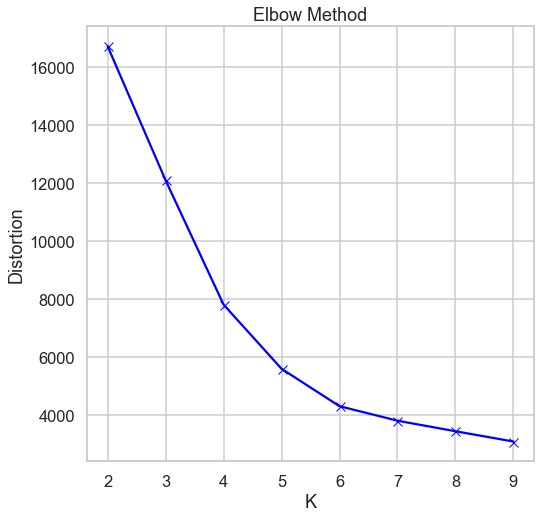

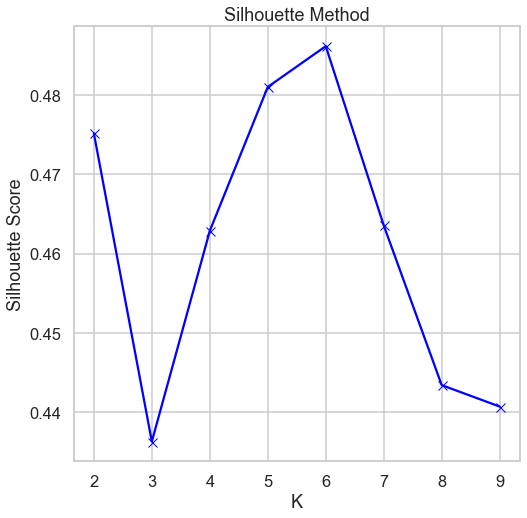

In [8]:
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.plot(Ks, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

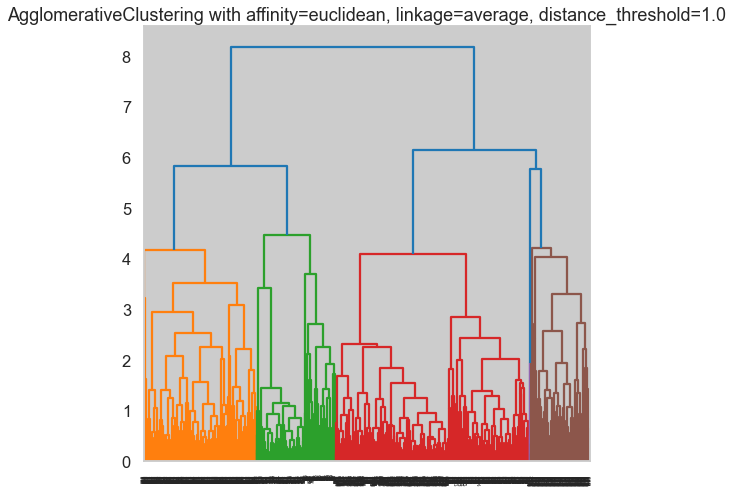

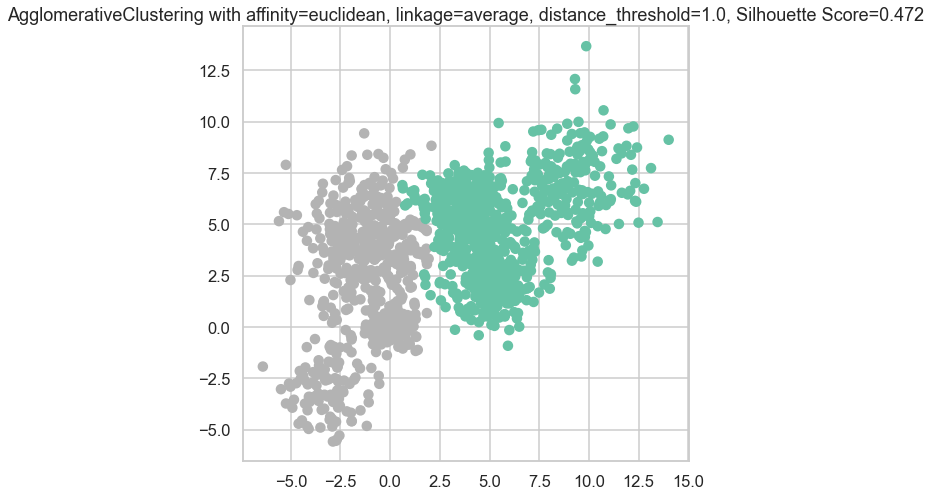

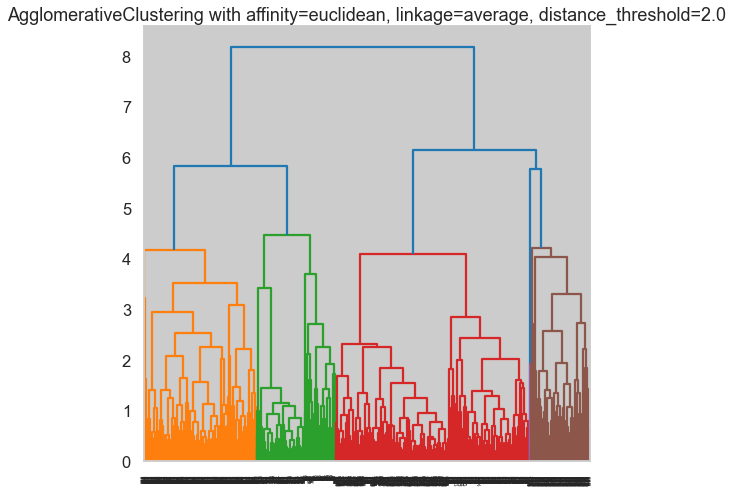

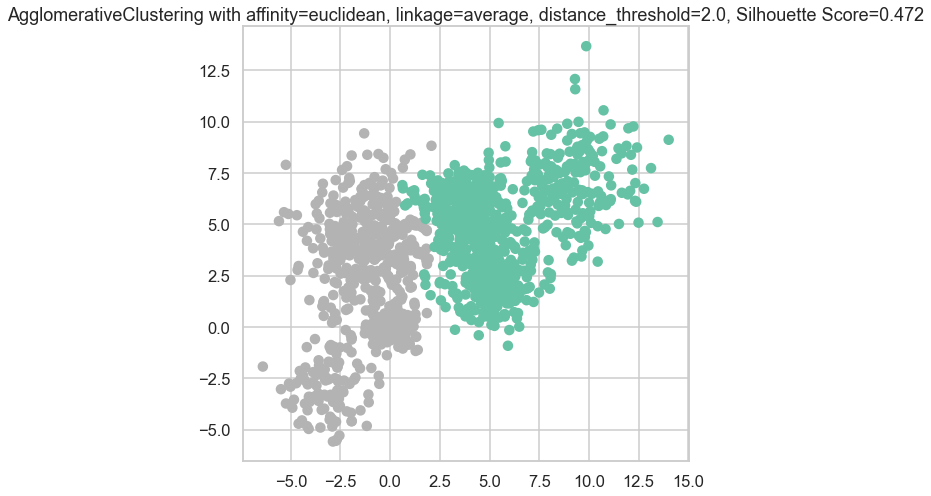

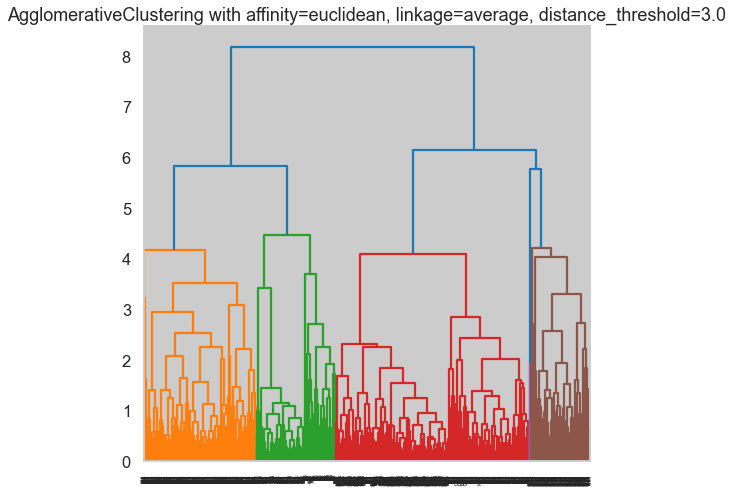

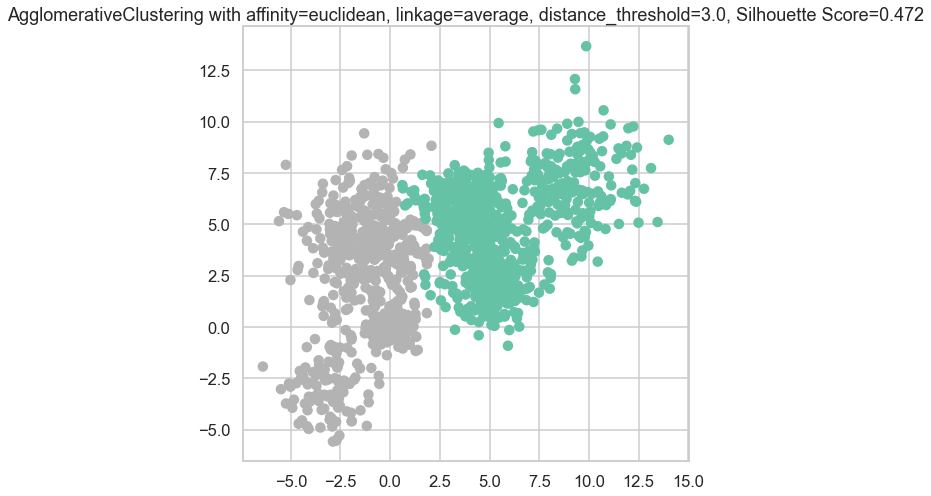

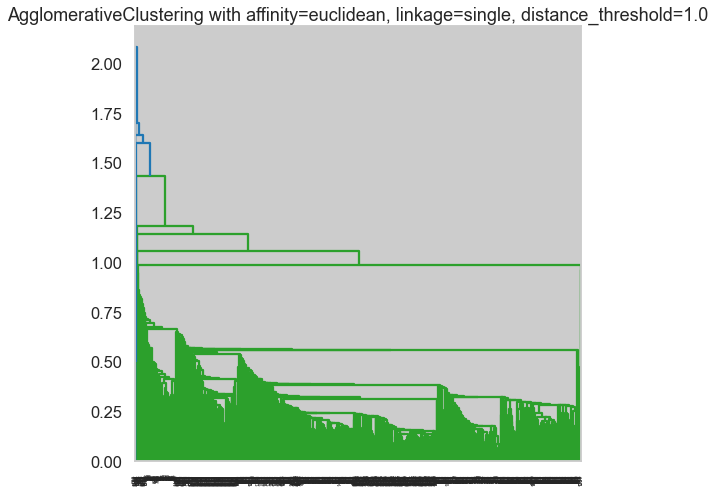

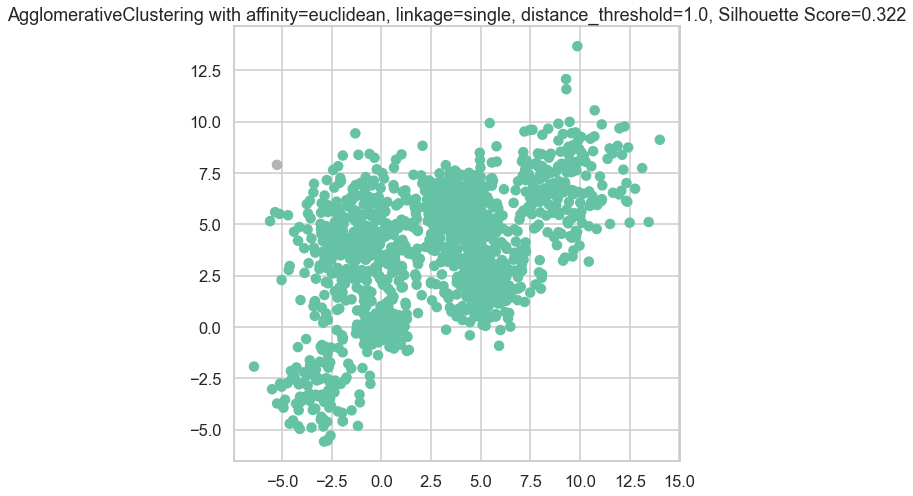

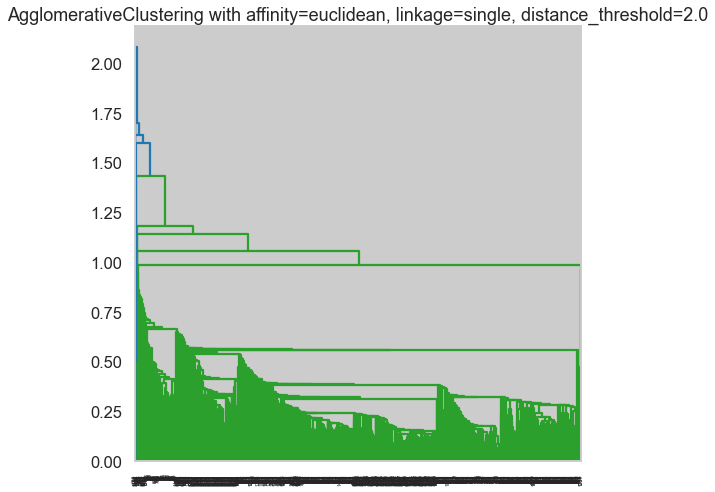

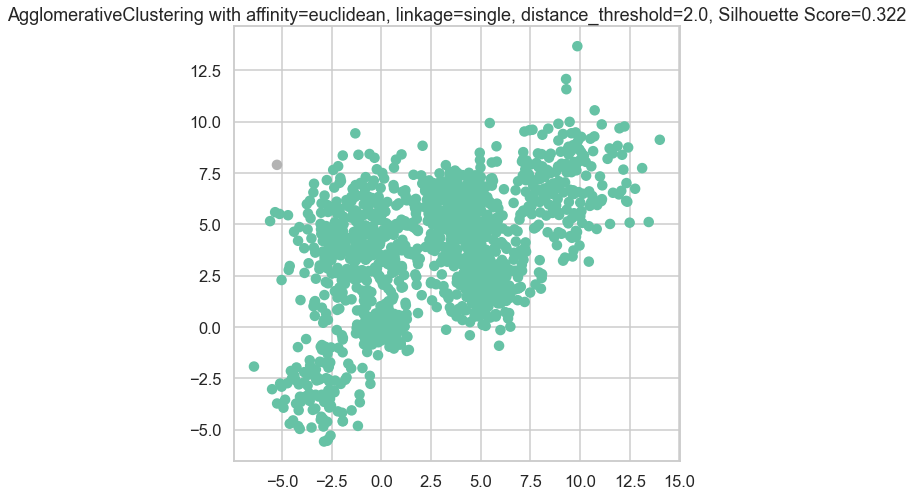

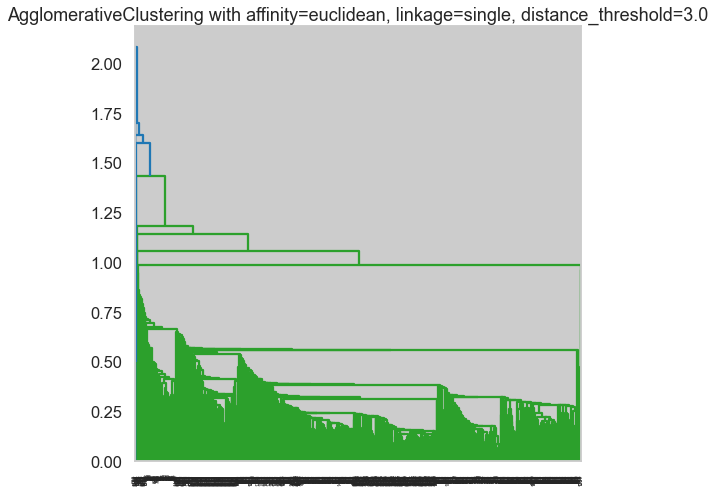

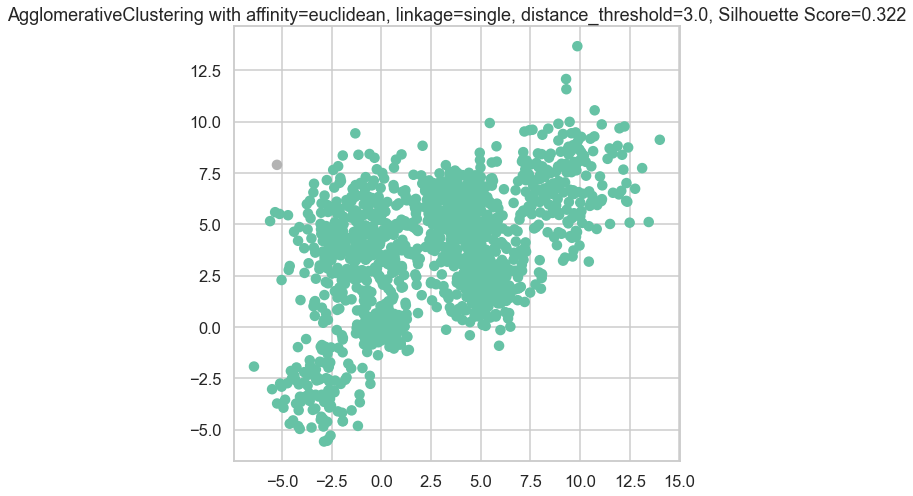

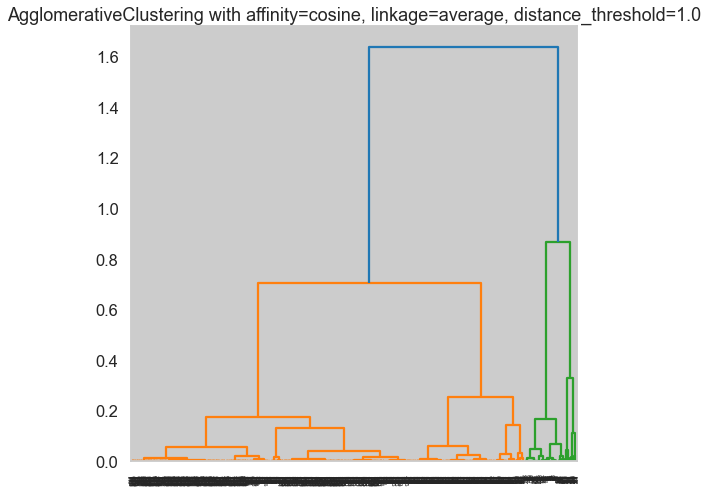

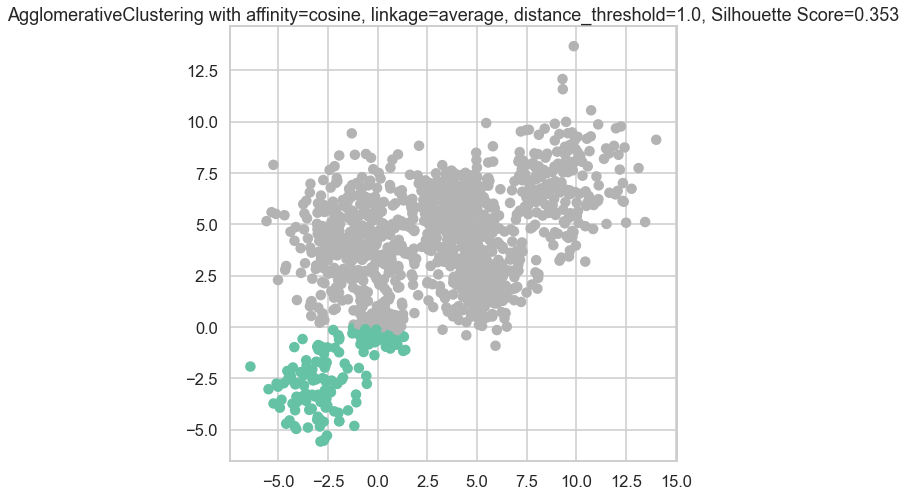

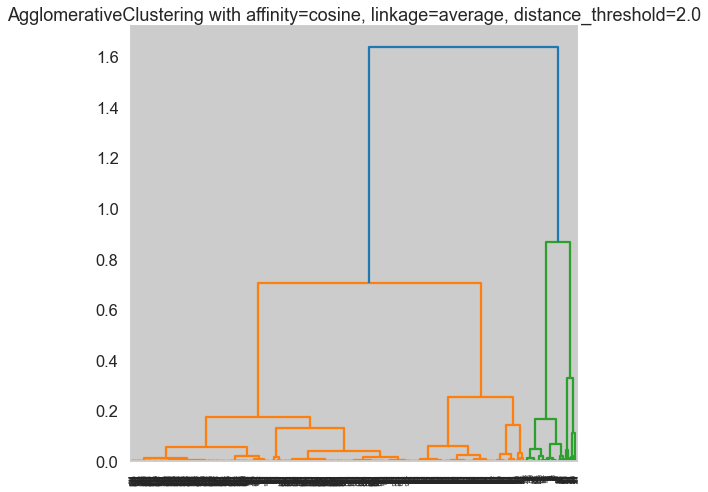

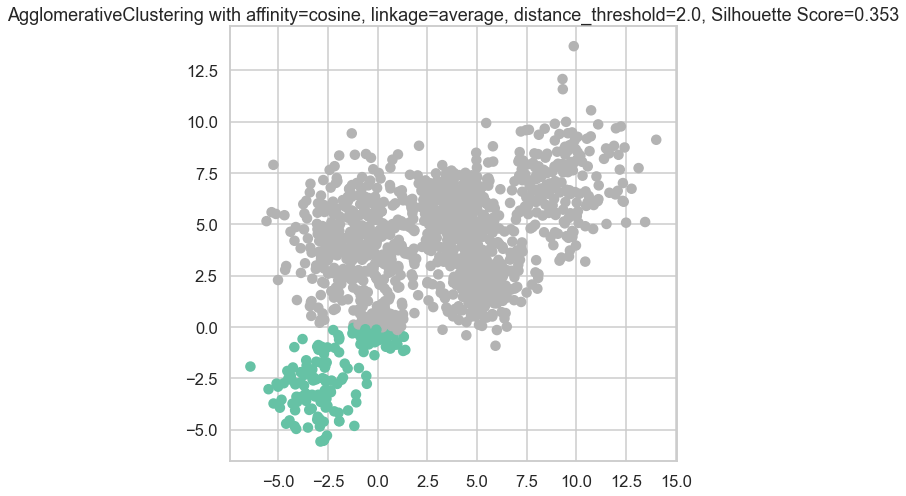

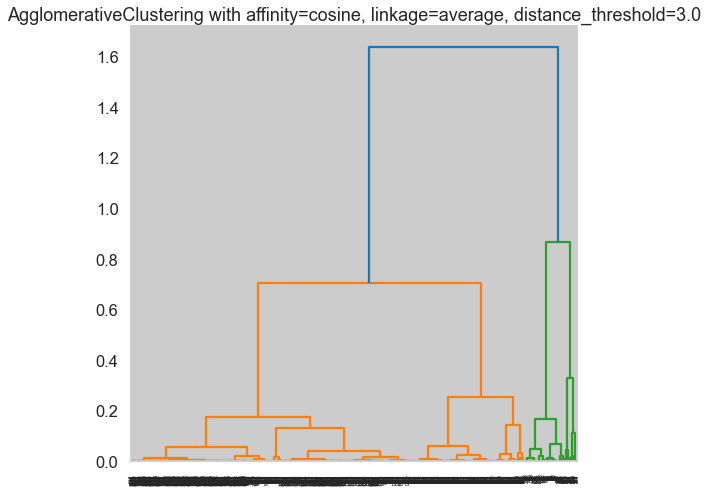

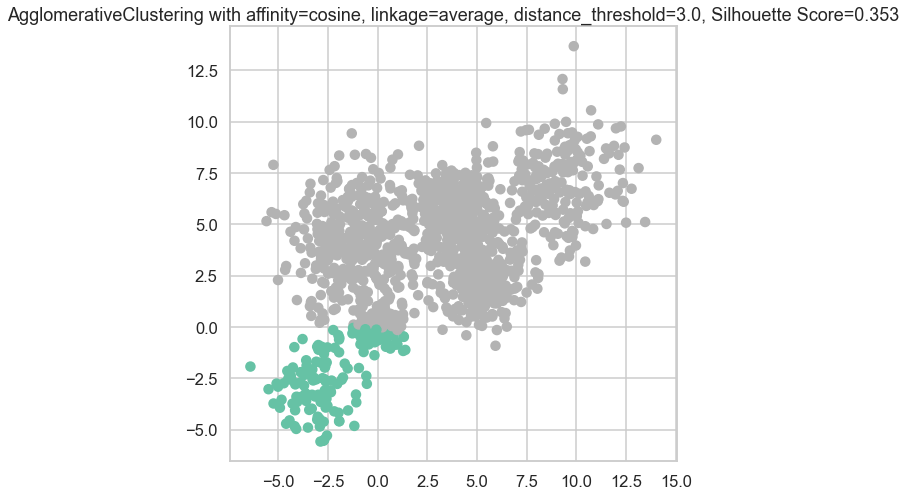

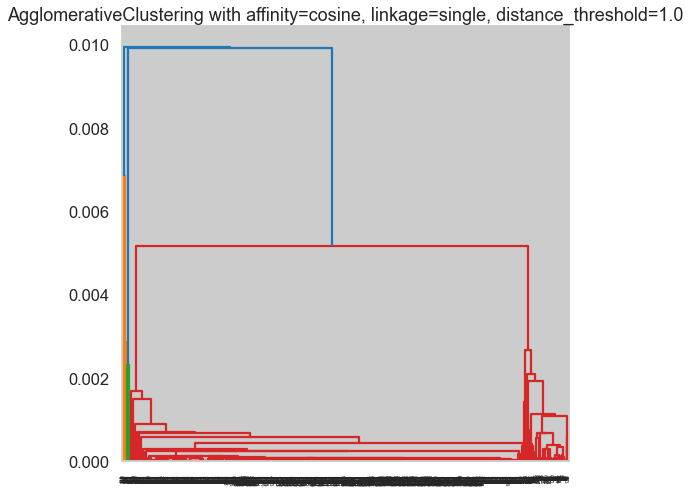

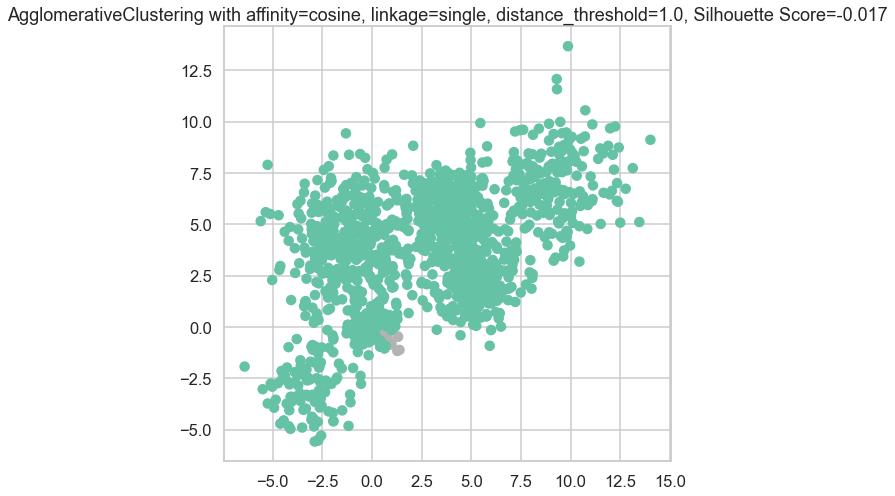

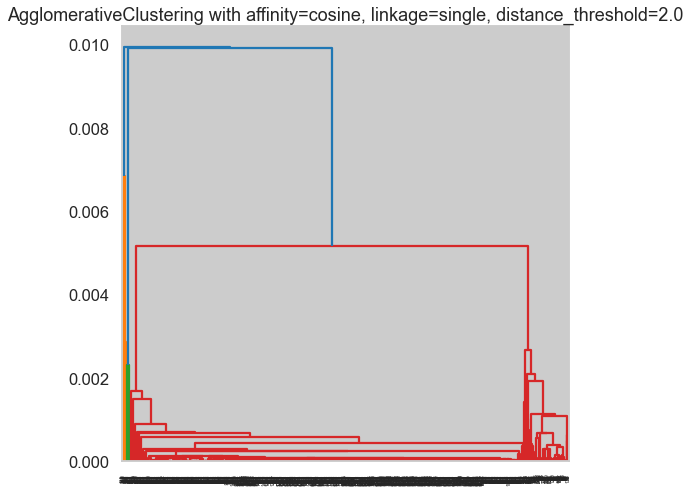

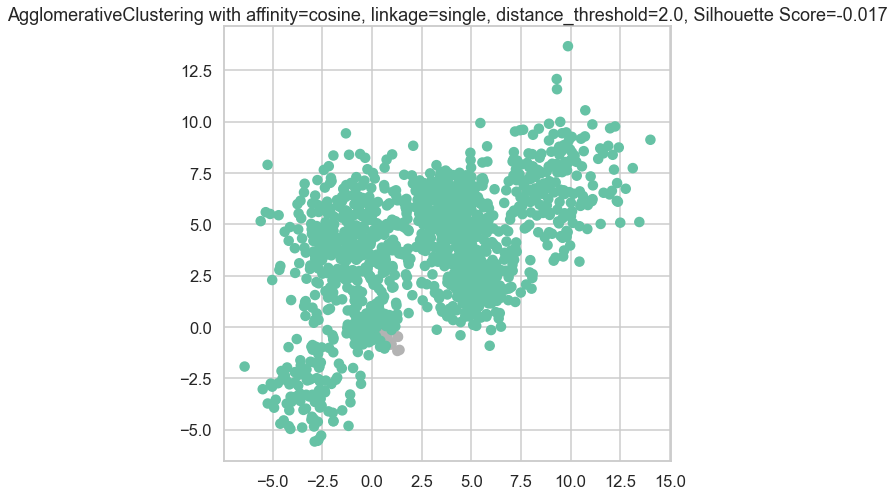

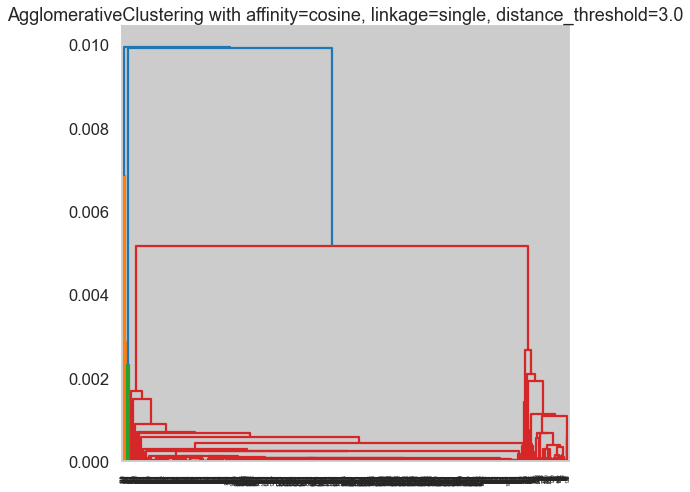

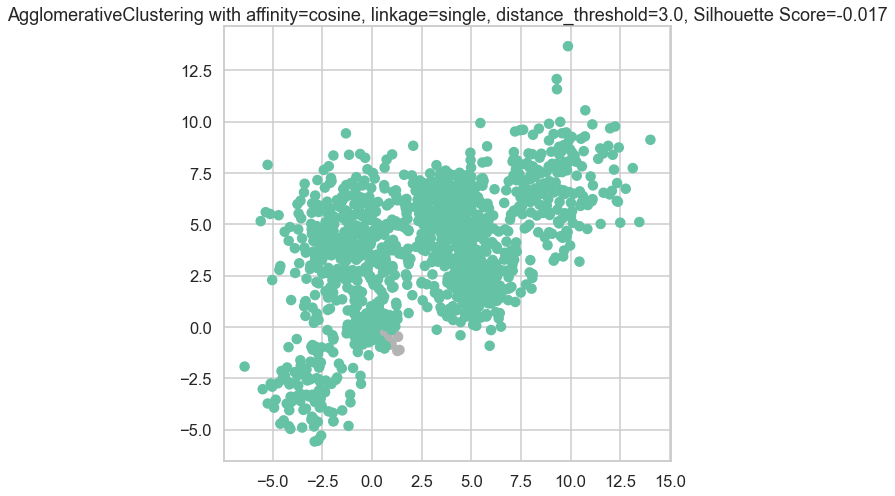

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create lists of different parameter values to try
affinities = ['euclidean','cosine']
linkages = ['average', 'single']
distance_thresholds = [1.0, 2.0, 3.0]

# Initialize an empty list to store the silhouette scores for each parameter combination
silhouette_scores = []

# Loop over the different parameter combinations
for affinity in affinities:
    for linkage_type in linkages:
        for threshold in distance_thresholds:
            # Initialize AgglomerativeClustering with the current parameter values
            clustering = AgglomerativeClustering(n_clusters=2, affinity=affinity, linkage=linkage_type, distance_threshold=None)
            
            # Fit AgglomerativeClustering to the data and calculate the silhouette score
            clustering.fit(Multi_blob_Data)
            score = silhouette_score(Multi_blob_Data, clustering.labels_)
            silhouette_scores.append(score)
            
            # Plot the dendrogram for the current parameter values
            plt.figure()
            plt.title("AgglomerativeClustering with affinity={}, linkage={}, distance_threshold={}".format(affinity, linkage_type, threshold))
            dendrogram(linkage(Multi_blob_Data, method=linkage_type, metric=affinity))
            plt.show()
            
            # Plot the clustering results for the current parameter values
            plt.figure()
            plt.title("AgglomerativeClustering with affinity={}, linkage={}, distance_threshold={}, Silhouette Score={:.3f}".format(affinity, linkage_type, threshold, score))
            plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=clustering.labels_, cmap="Set2")
            plt.show()


In [10]:
best_idx = np.argmax(silhouette_scores)
best_affinity = affinities[best_idx // (len(linkages) * len(distance_thresholds))]
best_linkage = linkages[(best_idx // len(distance_thresholds)) % len(linkages)]
best_threshold = distance_thresholds[best_idx % len(distance_thresholds)]
best_score = silhouette_scores[best_idx]

print("Best parameters: affinity={}, linkage={}, distance_threshold={}".format(best_affinity, best_linkage, best_threshold))
print("Best silhouette score: {:.3f}".format(best_score))


Best parameters: affinity=euclidean, linkage=average, distance_threshold=1.0
Best silhouette score: 0.472


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

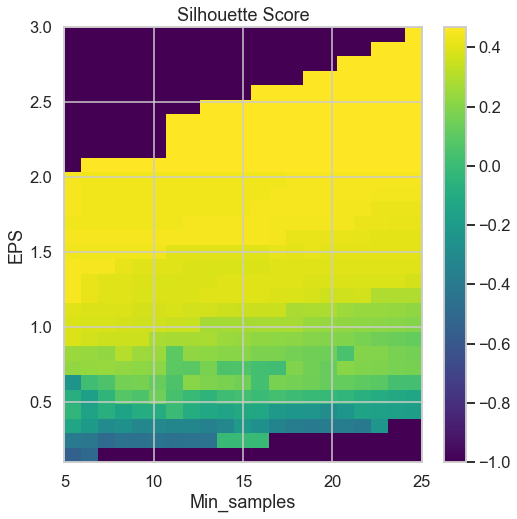

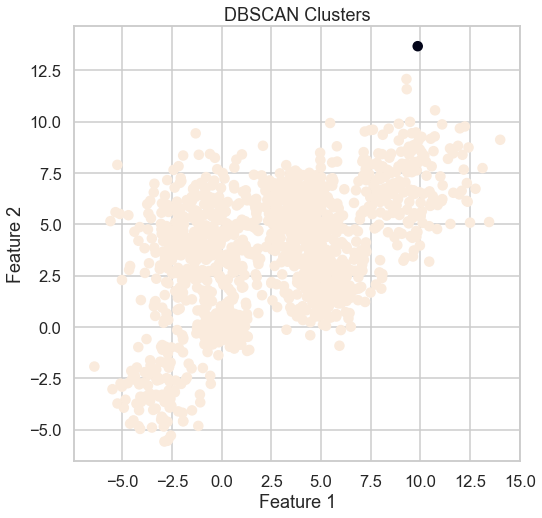

Best parameters: eps=2.0999999999999996, min_samples=6
Best silhouette score: 0.4685207355522043


In [11]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define range of parameter values to test
eps_range = np.linspace(0.1, 3, 30)
min_samples_range = range(5, 26)

# Initialize variables to store best parameters and silhouette score
best_eps = None
best_min_samples = None
best_silhouette_score = -1

# Loop over parameter values and compute silhouette scores
silhouette_scores = []
for eps in eps_range:
    row_scores = []
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(Multi_blob_Data)
        if len(set(labels)) > 1:
            score = silhouette_score(Multi_blob_Data, labels)
        else:
            score = -1
        row_scores.append(score)
        if score > best_silhouette_score:
            best_silhouette_score = score
            best_eps = eps
            best_min_samples = min_samples
    silhouette_scores.append(row_scores)

# Plot silhouette scores
plt.imshow(silhouette_scores, cmap='viridis', origin='lower', extent=[min_samples_range[0], min_samples_range[-1], eps_range[0], eps_range[-1]], aspect='auto')
plt.colorbar()
plt.xlabel('Min_samples')
plt.ylabel('EPS')
plt.title('Silhouette Score')
plt.show()

# Compute DBSCAN with best parameters and plot resulting clusters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(Multi_blob_Data)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clusters')
plt.show()

# Print best parameters and silhouette score
print('Best parameters: eps={}, min_samples={}'.format(best_eps, best_min_samples))
print('Best silhouette score: {}'.format(best_silhouette_score))


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [13]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

covariance_types = ['full', 'tied', 'diag', 'spherical']

best_score = -np.inf
best_gmm = None

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=6, covariance_type=cov_type)
    gmm.fit(Multi_blob_Data)
    score = gmm.score(Multi_blob_Data)
    if score > best_score:
        best_score = score
        best_gmm = gmm

print(f"Best log-likelihood score: {best_score:.3f} with covariance_type={best_gmm.covariance_type}")


Best log-likelihood score: -4.769 with covariance_type=full


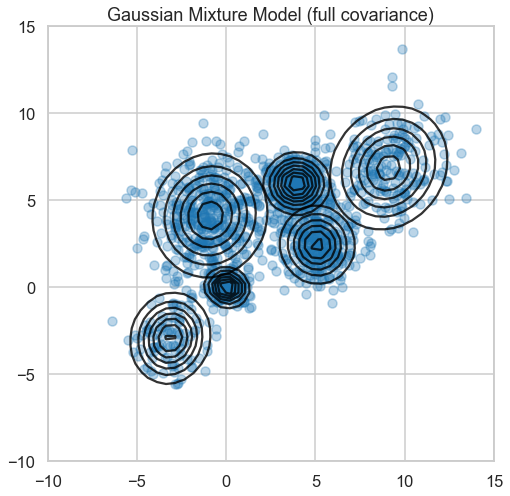

In [14]:
def plot_gmm(gmm, X):
    x, y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(X[:, 0], X[:, 1], alpha=0.3)
    ax.set_xlim([-10, 15])
    ax.set_ylim([-10, 15])
    for i in range(gmm.n_components):
        covariances = gmm.covariances_
        if gmm.covariance_type == 'spherical':
            covariances = np.eye(2) * covariances[i]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.eye(2) * covariances[i]
        else:
            covariances = covariances[i]
        rv = multivariate_normal(mean=gmm.means_[i], cov=covariances)
        ax.contour(x, y, rv.pdf(pos), colors='black', alpha=0.8)
    plt.title(f"Gaussian Mixture Model ({gmm.covariance_type} covariance)")
    plt.show()

plot_gmm(best_gmm, Multi_blob_Data)


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [15]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [16]:
from sklearn.datasets import load_iris

iris_data = load_iris()

X = iris_data.data
y = iris_data.target


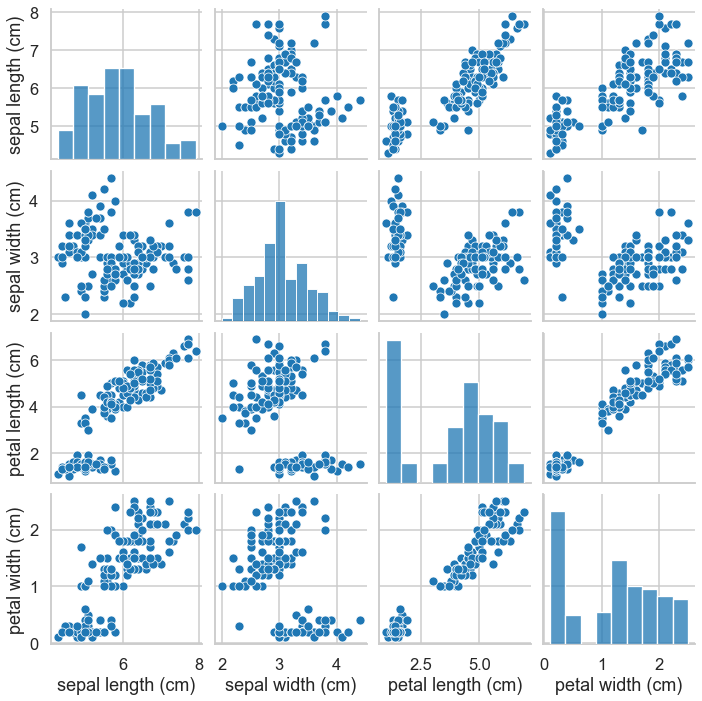

In [17]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(X, columns=iris_data.feature_names)
sns.pairplot(df)


<AxesSubplot:>

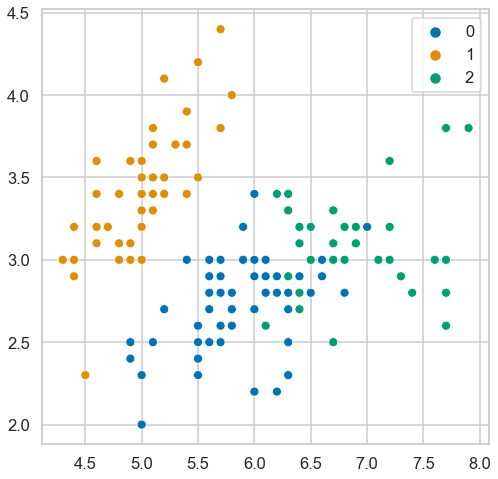

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

y_pred = kmeans.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

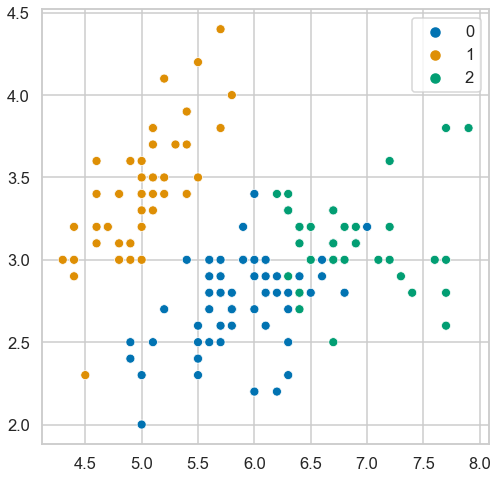

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(X)

y_pred = agg.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

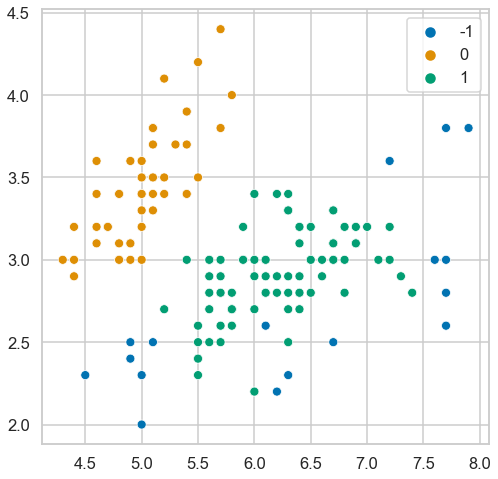

In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

y_pred = dbscan.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

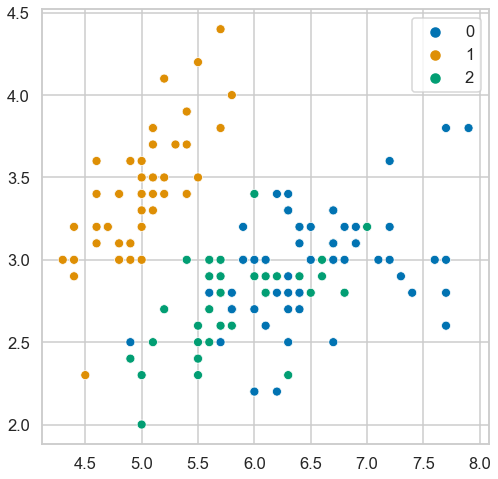

In [21]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

y_pred = gmm.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


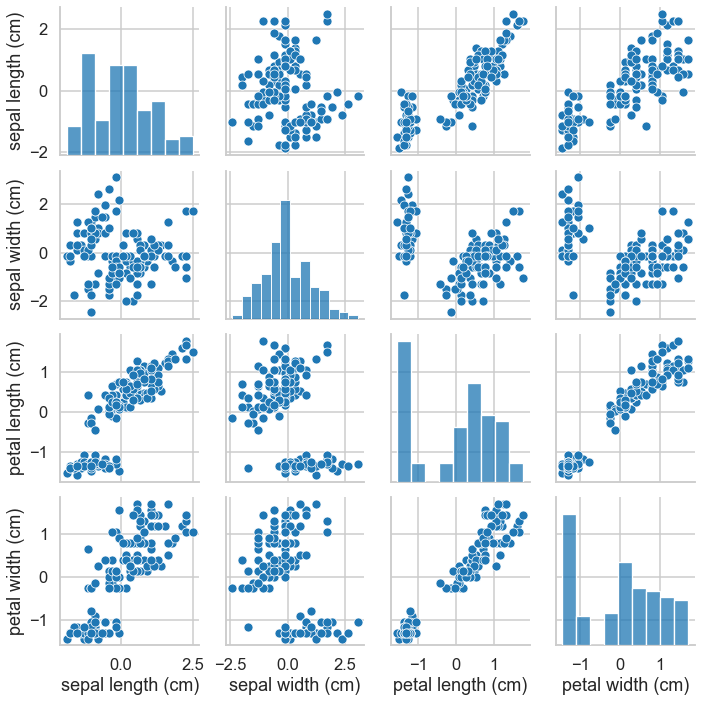

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

sns.pairplot(pd.DataFrame(X_norm, columns=iris_data.feature_names))


## Customer dataset
Repeat all the above on the customer data set 

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [24]:
file_path = r"D:\GUC\Semester 10\Machine Learning\Assignments\3\Customer data.csv"
df = pd.read_csv(file_path)


In [25]:
df = pd.get_dummies(df, columns=['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'], drop_first=True)

In [26]:
distortions = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))
    print("For k =", k, "Silhouette score is", silhouette_scores[-1])


For k = 2 Silhouette score is 0.5828454749077369
For k = 3 Silhouette score is 0.5112466509209855
For k = 4 Silhouette score is 0.541119772856174
For k = 5 Silhouette score is 0.5379399050569561
For k = 6 Silhouette score is 0.5396088796479623
For k = 7 Silhouette score is 0.5281152103293594
For k = 8 Silhouette score is 0.5353232375458965
For k = 9 Silhouette score is 0.5292910595263622
For k = 10 Silhouette score is 0.5274593654731823


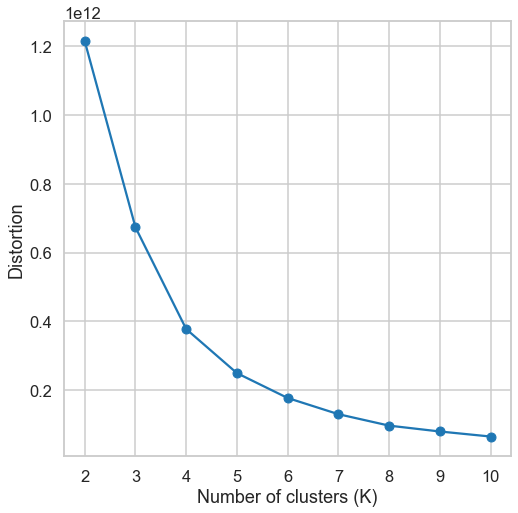

In [27]:
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.show()


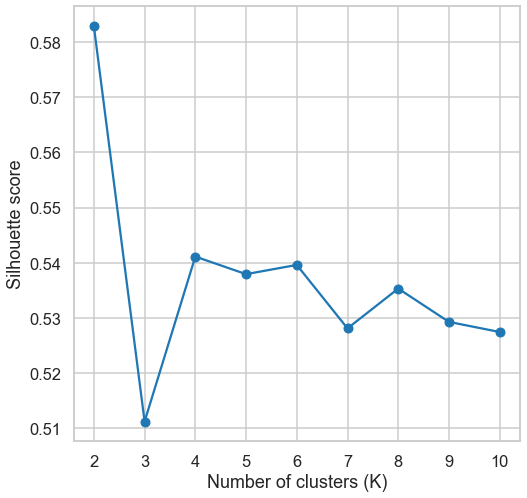

In [28]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.show()


In [29]:
best_k = np.argmax(silhouette_scores) + 2
best_silhouette_score = silhouette_scores[best_k - 2]
print("Best value of K =", best_k)
print("Silhouette score for best K =", best_silhouette_score)


Best value of K = 2
Silhouette score for best K = 0.5828454749077369


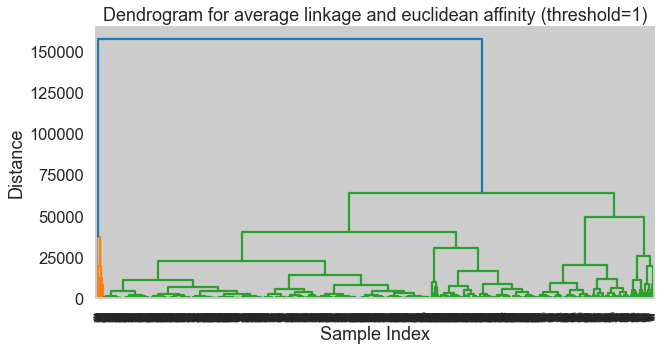

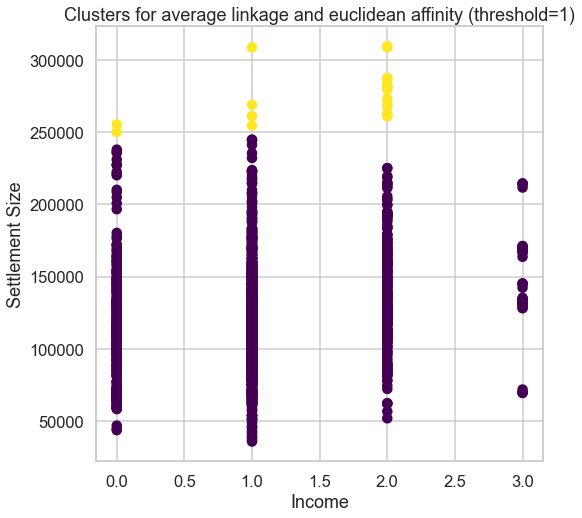

Silhouette score for average linkage and euclidean affinity (threshold=1): 0.729


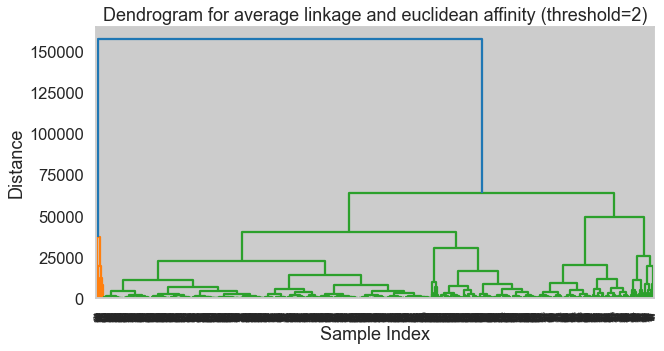

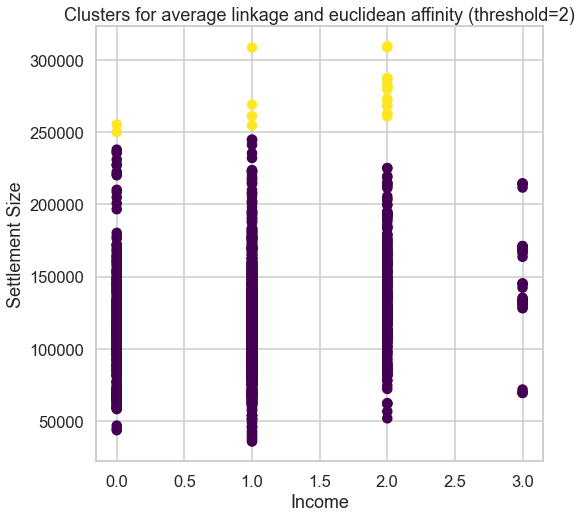

Silhouette score for average linkage and euclidean affinity (threshold=2): 0.729


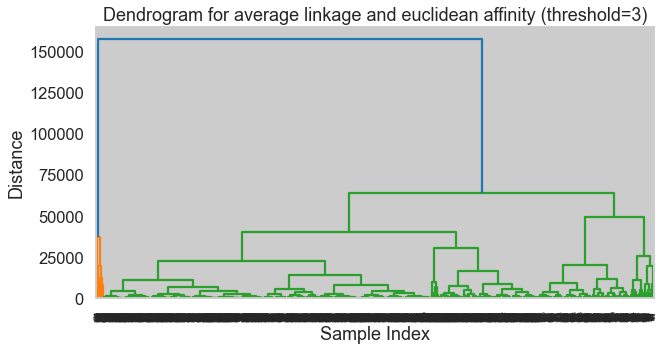

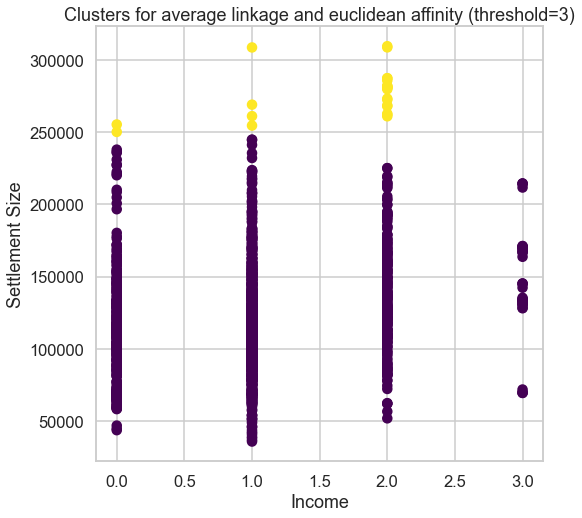

Silhouette score for average linkage and euclidean affinity (threshold=3): 0.729


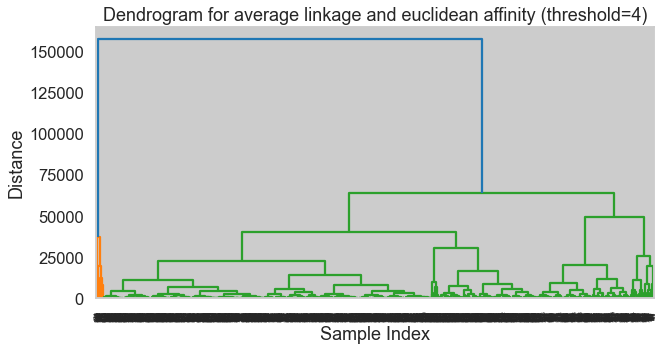

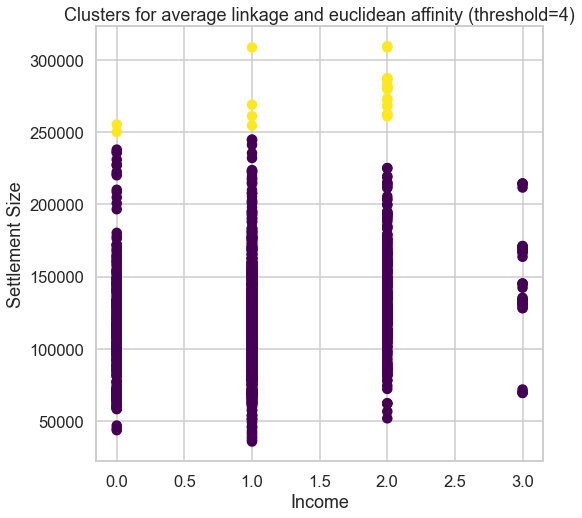

Silhouette score for average linkage and euclidean affinity (threshold=4): 0.729


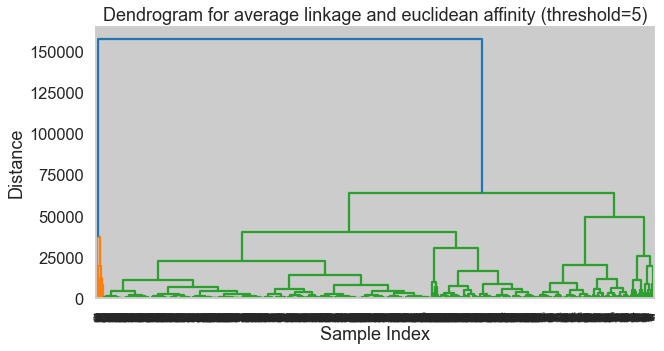

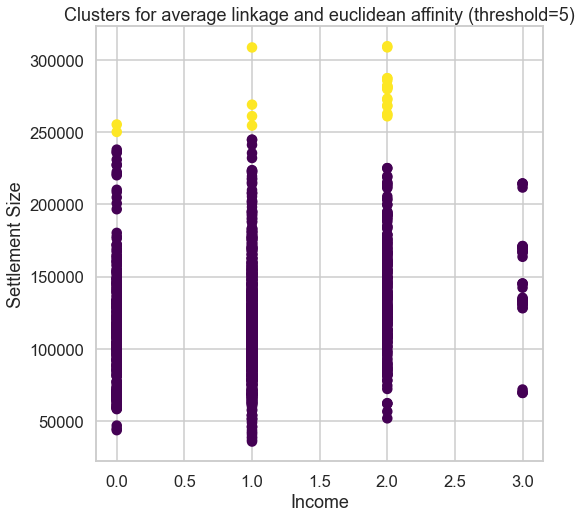

Silhouette score for average linkage and euclidean affinity (threshold=5): 0.729


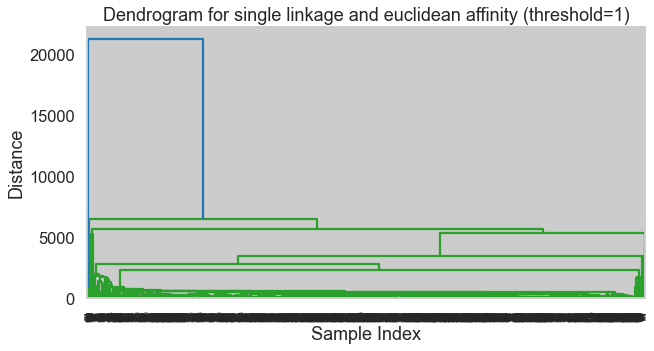

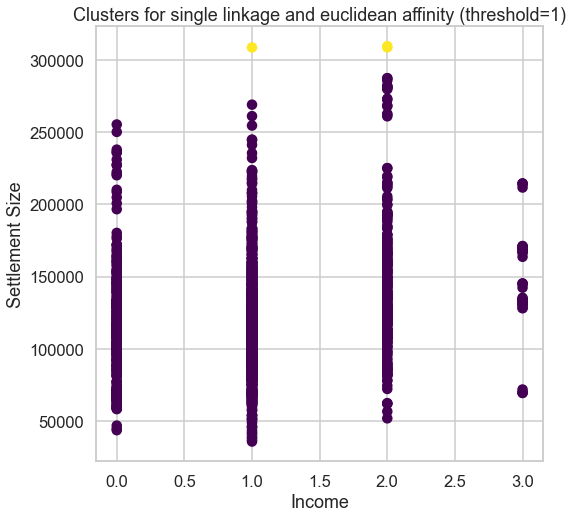

Silhouette score for single linkage and euclidean affinity (threshold=1): 0.759


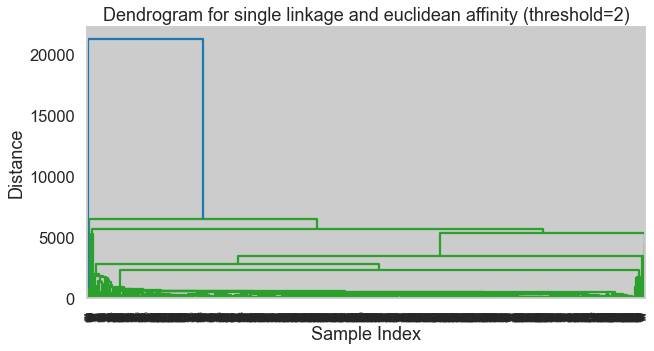

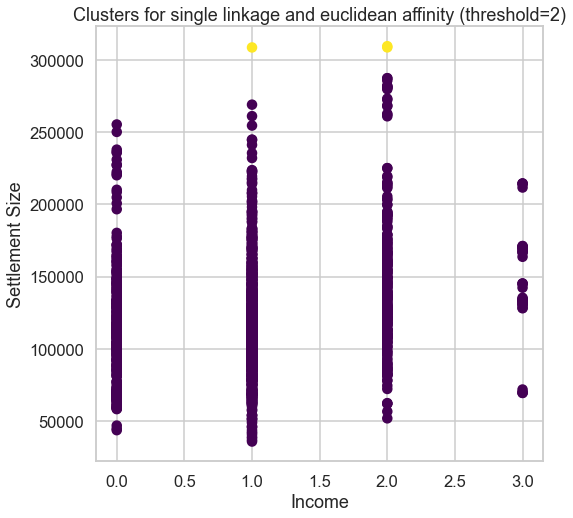

Silhouette score for single linkage and euclidean affinity (threshold=2): 0.759


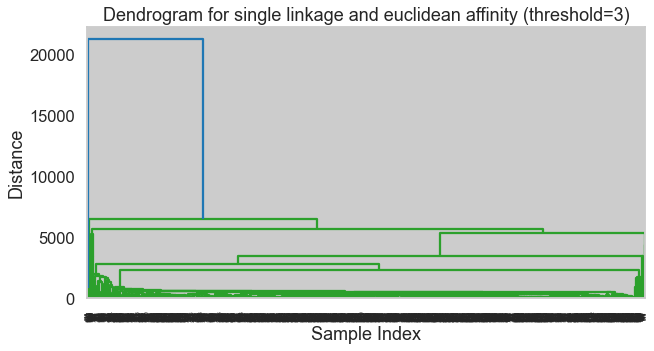

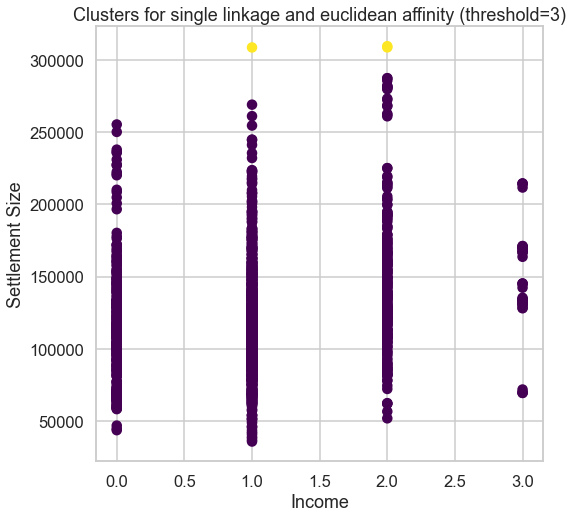

Silhouette score for single linkage and euclidean affinity (threshold=3): 0.759


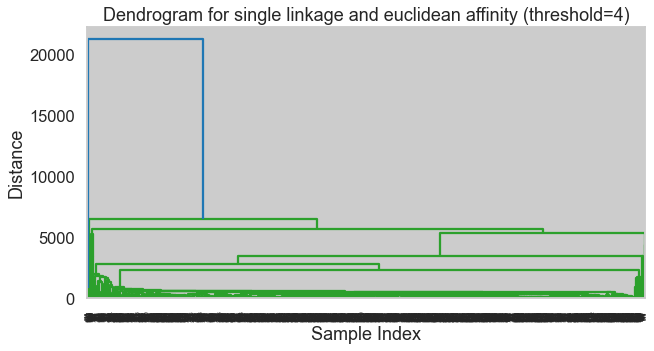

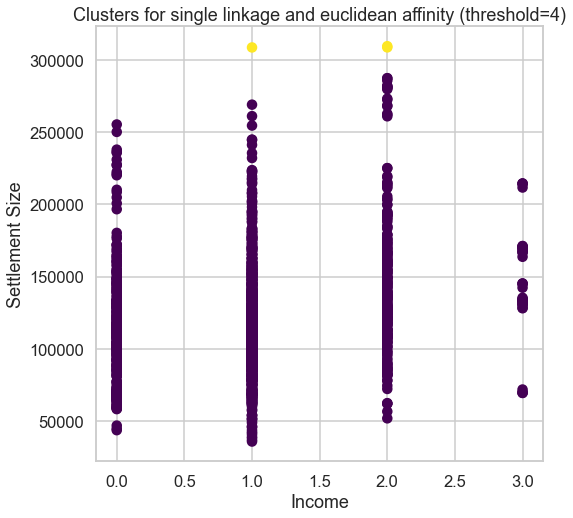

Silhouette score for single linkage and euclidean affinity (threshold=4): 0.759


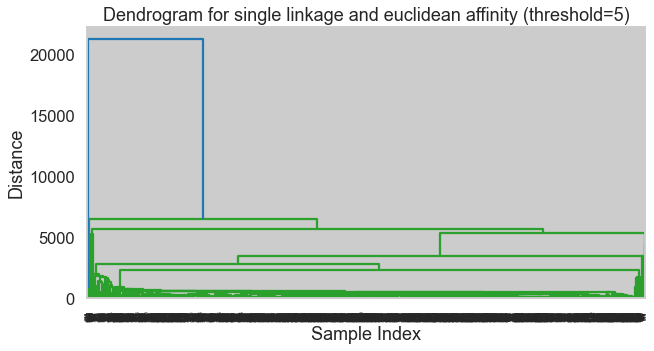

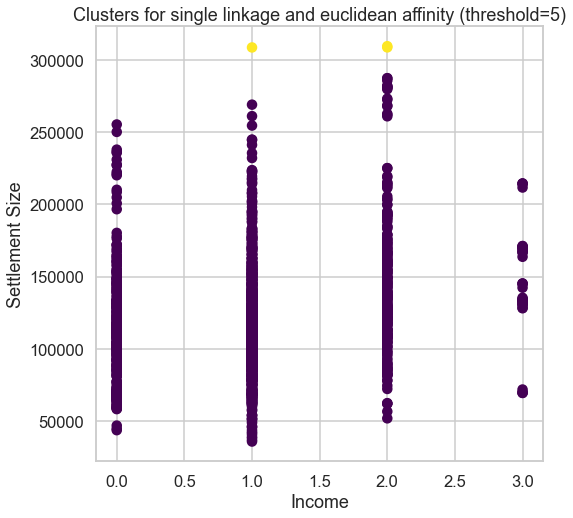

Silhouette score for single linkage and euclidean affinity (threshold=5): 0.759


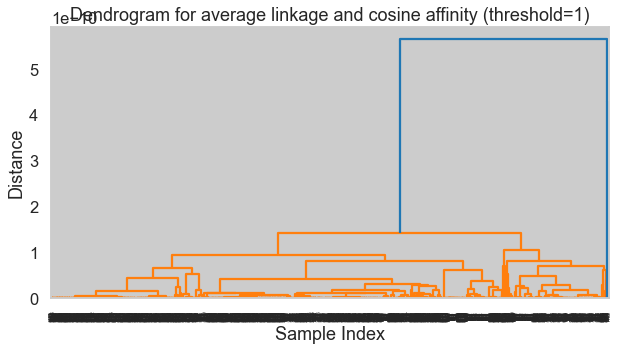

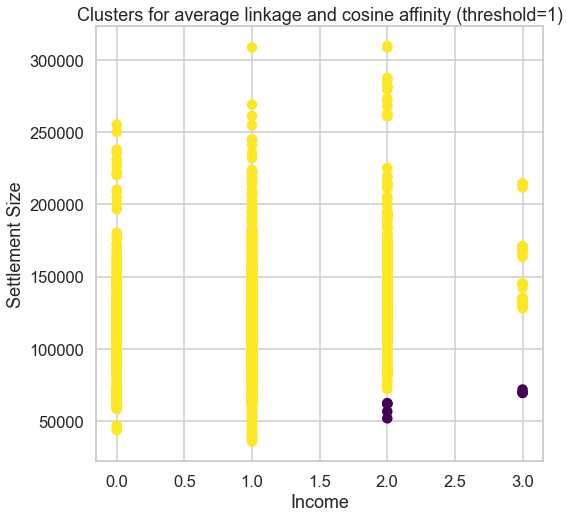

Silhouette score for average linkage and cosine affinity (threshold=1): 0.205


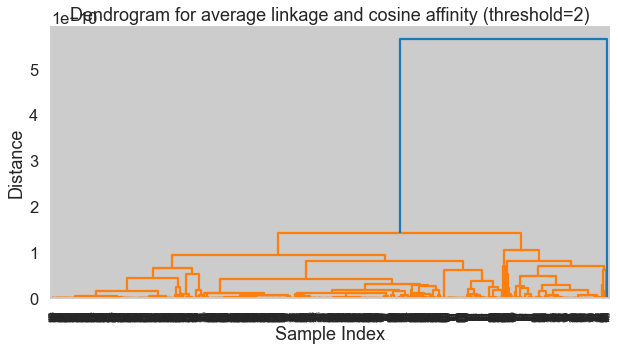

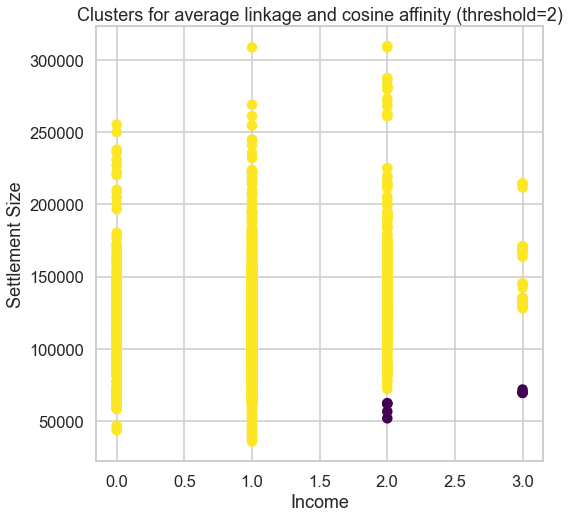

Silhouette score for average linkage and cosine affinity (threshold=2): 0.205


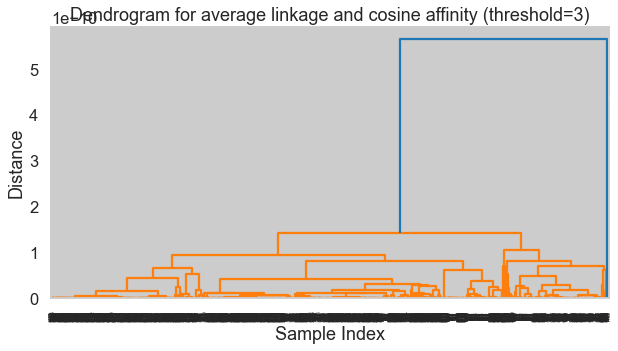

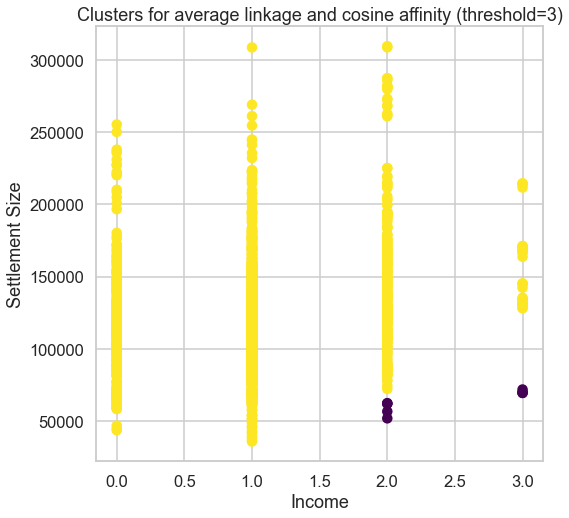

Silhouette score for average linkage and cosine affinity (threshold=3): 0.205


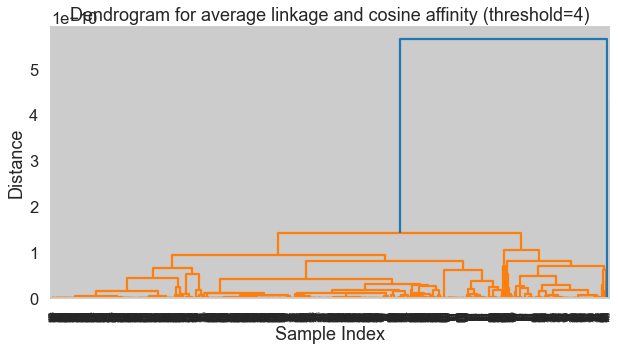

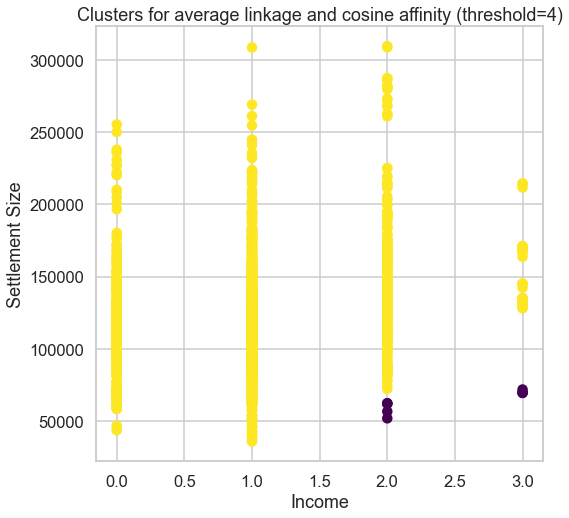

Silhouette score for average linkage and cosine affinity (threshold=4): 0.205


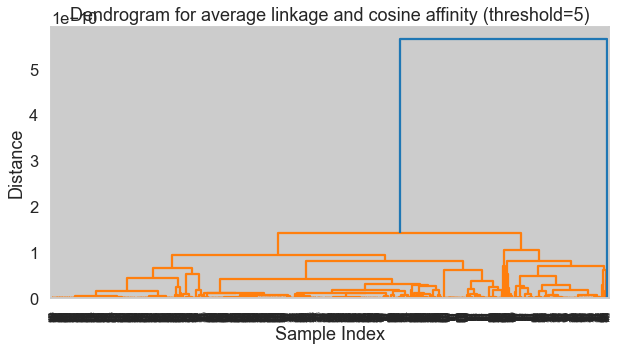

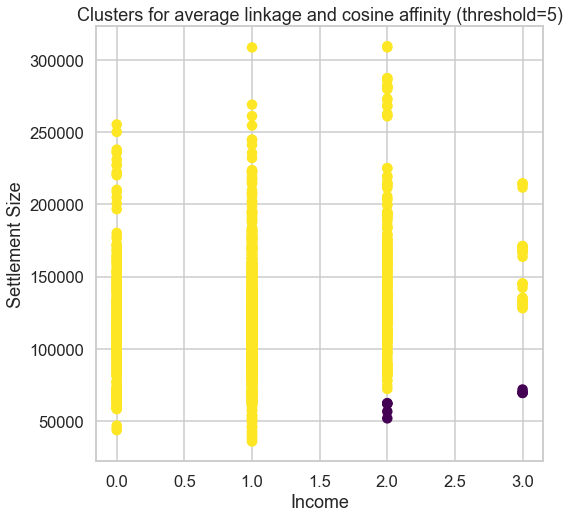

Silhouette score for average linkage and cosine affinity (threshold=5): 0.205


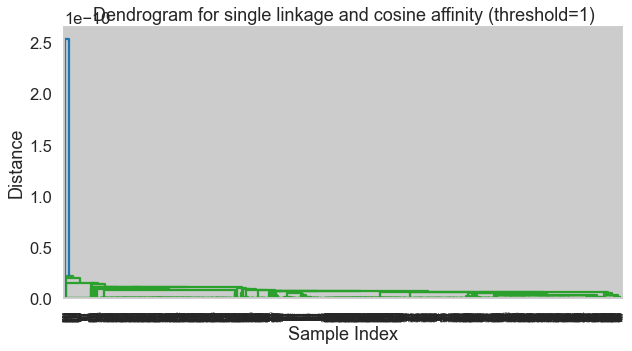

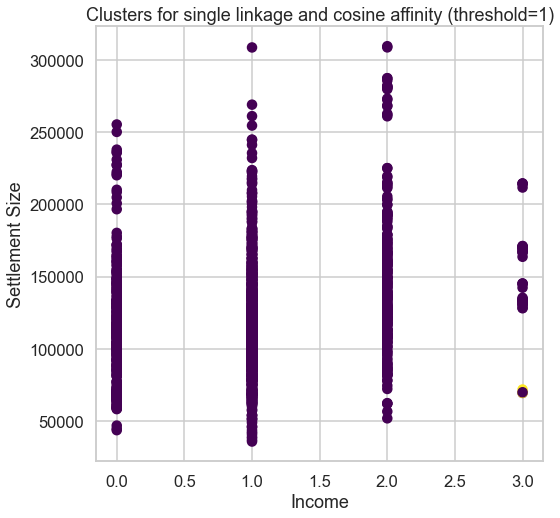

Silhouette score for single linkage and cosine affinity (threshold=1): 0.110


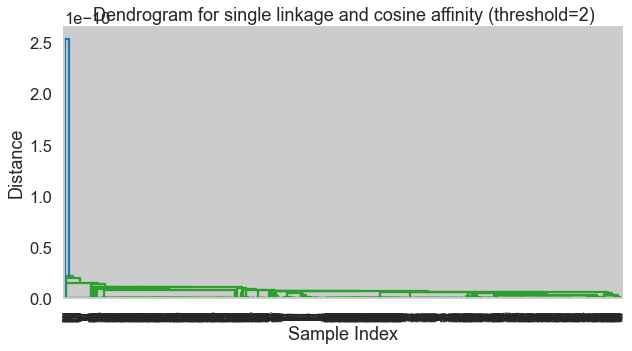

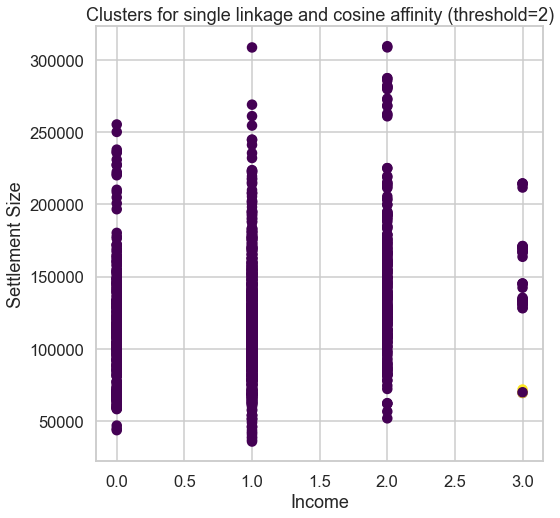

Silhouette score for single linkage and cosine affinity (threshold=2): 0.110


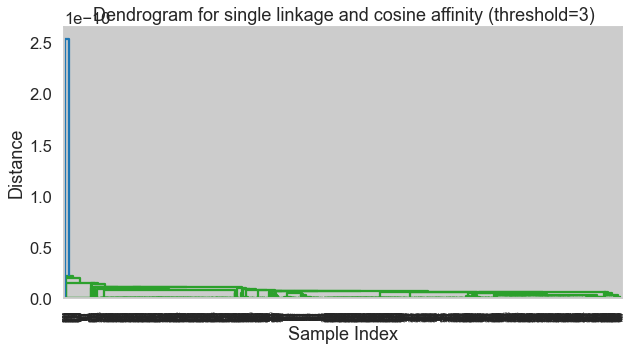

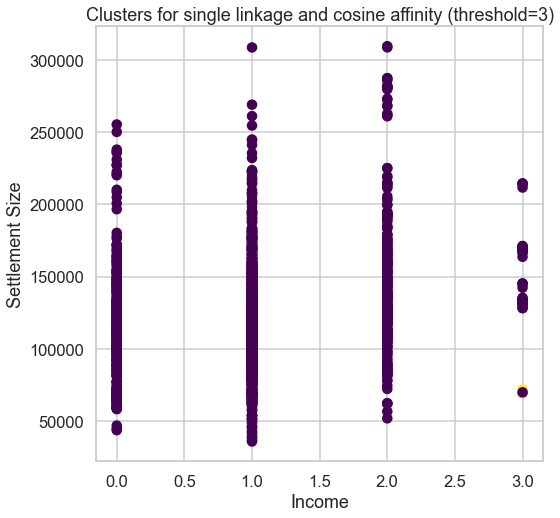

Silhouette score for single linkage and cosine affinity (threshold=3): 0.110


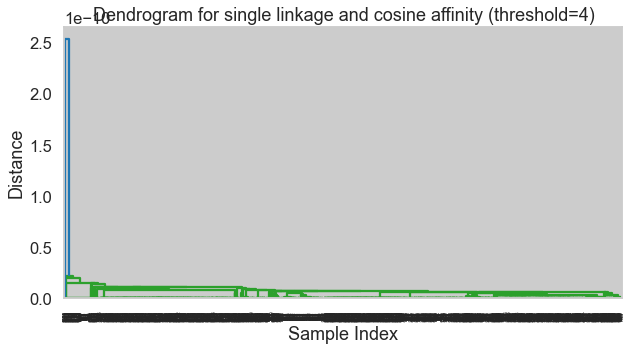

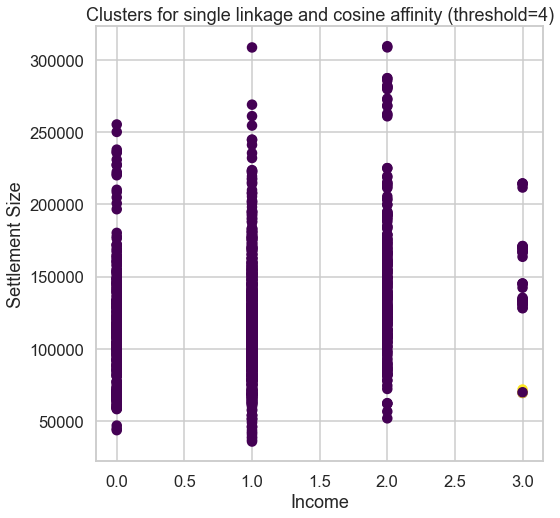

Silhouette score for single linkage and cosine affinity (threshold=4): 0.110


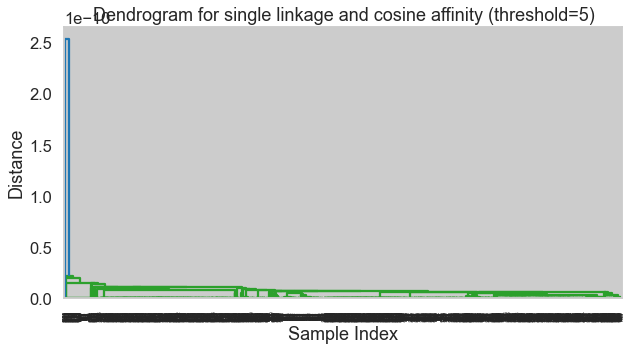

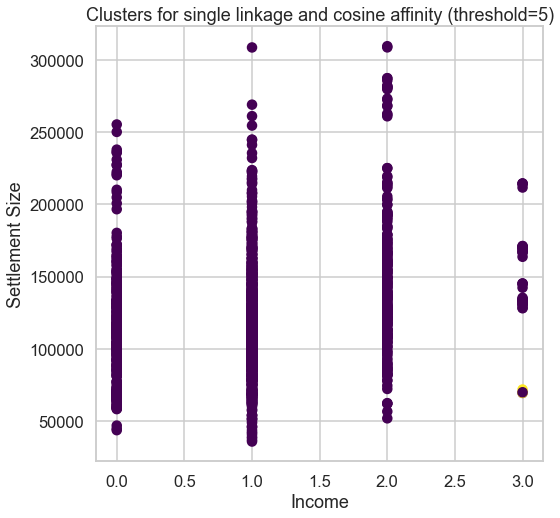

Silhouette score for single linkage and cosine affinity (threshold=5): 0.110
Best parameters: {'affinity': 'euclidean', 'linkage': 'single', 'distance_threshold': 1}
Best silhouette score: 0.759


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


file_path = r"D:\GUC\Semester 10\Machine Learning\Assignments\3\Customer data.csv"
df = pd.read_csv(file_path)
# Extract the features
X = df.iloc[:, 4:].values

# Define the parameter grids to search over
affinities = ['euclidean', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [1, 2, 3, 4, 5]

# Initialize variables to store the best parameters and silhouette score
best_params = {}
best_score = -1

# Loop over parameter grids and find the best parameters and silhouette score
for affinity in affinities:
    for linkage_type in linkages:
        for distance_threshold in distance_thresholds:
            
            # Perform agglomerative clustering with the current parameters
            clustering = AgglomerativeClustering(n_clusters=2,
                                                  affinity=affinity,
                                                  linkage=linkage_type,
                                                  distance_threshold=None)
            clustering.fit(X)
            
            # Calculate the silhouette score for the current clustering
            score = silhouette_score(X, clustering.labels_)
            
            # Update the best score and parameters if the current score is higher
            if score > best_score:
                best_score = score
                best_params = {'affinity': affinity,
                               'linkage': linkage_type,
                               'distance_threshold': distance_threshold}
            
            # Plot the dendrogram for the current clustering
            linkage_matrix = linkage(X, method=linkage_type, metric=affinity)
            plt.figure(figsize=(10, 5))
            dendrogram(linkage_matrix)
            plt.title(f"Dendrogram for {linkage_type} linkage and {affinity} affinity (threshold={distance_threshold})")
            plt.xlabel("Sample Index")
            plt.ylabel("Distance")
            plt.show()
            
            # Display the resulting clusters
            plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
            plt.title(f"Clusters for {linkage_type} linkage and {affinity} affinity (threshold={distance_threshold})")
            plt.xlabel("Income")
            plt.ylabel("Settlement Size")
            plt.show()
            
            # Print the silhouette score for the current clustering
            print(f"Silhouette score for {linkage_type} linkage and {affinity} affinity (threshold={distance_threshold}): {score:.3f}")

# Print the best parameters and silhouette score
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score:.3f}")


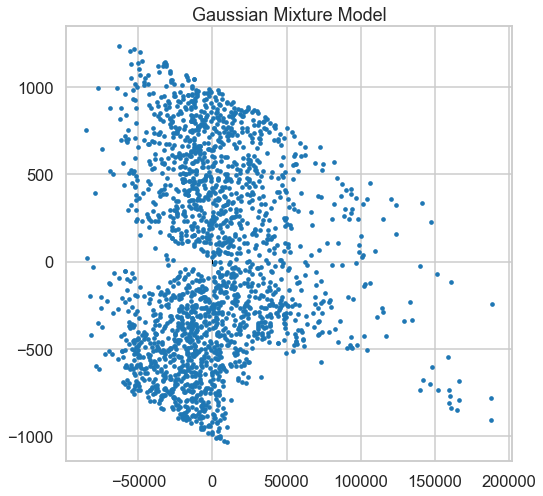

In [32]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# load the data
data = pd.read_csv('Customer data.csv')

# apply PCA to reduce dimensionality to 2 features
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# fit Gaussian mixture model with different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
gmm_scores = []
for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type)
    gmm.fit(data_pca)
    gmm_scores.append(gmm.score(data_pca))

# plot the resulting distribution
plt.figure(figsize=(8, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=10)
for i, cov_type in enumerate(covariance_types):
    x, y = np.meshgrid(np.linspace(-6, 10), np.linspace(-6, 10))
    XX = np.array([x.ravel(), y.ravel()]).T
    Z = -gmm_scores[i] * gmm.predict_proba(XX)[:, 0]
    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, levels=10, linewidths=1, colors='k', alpha=0.5)
    plt.contourf(x, y, Z, levels=10, cmap='RdBu_r', alpha=0.5)
    plt.title('Gaussian Mixture Model')
plt.show()


Best eps: 2.0
Best min_samples: 5
Best silhouette score: 0.40413907397275856


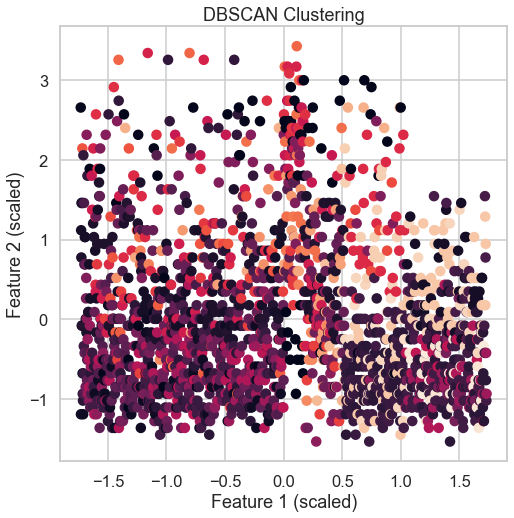

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


file_path = r"D:\GUC\Semester 10\Machine Learning\Assignments\3\Customer data.csv"
df = pd.read_csv(file_path)

df = pd.get_dummies(df, columns=['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size'], drop_first=True)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Try different values of eps and min_samples
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 20]

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

# Loop over all combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Train DBSCAN model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Compute silhouette score
        score = silhouette_score(X_scaled, labels)

        # Update best score and parameters if applicable
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels

# Print best parameters and score
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_score}")

# Plot resulting clusters
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
